# Stock Price Prediction With LSTM
Author: Daniel Soares
Date: 10/11/2020

This notebook describe the process of future stock price prediction using LSTM.
The process is devided into: 
Part 0 - Data Analysing; 
Part 1 - Data Preprocessing; 
Part 2 - Building the LSTM model; 
Part 3 - Making the prediction and visualising the results 

## Part 0 - Data Analysing

### Importing the libraries

In [84]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import yfinance as yf
from pandas_datareader import data as pdr
from datetime import datetime, timedelta
import seaborn as sns
from mplfinance.original_flavor import candlestick_ohlc

%matplotlib inline

### Downloading the stock price history of several companies taking into account the last 3 years

In [2]:
# parameters
companies = ['GOOG', 'AMZN', 'MSFT', 'AAPL','TSLA', 'EBAY', 'PETR4.SA', 'Vale', 'MGLU3.SA'] 
timerange_years = 3
end_date = datetime.now()

# Downloading the dataset
def download_stockdata(companies, timerange_years, end_date):
    start_date = end_date - timedelta(days=timerange_years*365)
    yf.pdr_override()
    df_companies = pdr.get_data_yahoo(companies, start=start_date, end=end_date)
    return df_companies
    

df_companies = download_stockdata(companies, timerange_years, end_date)

[*********************100%***********************]  9 of 9 completed


### Visualizing the close stock price history of all companies

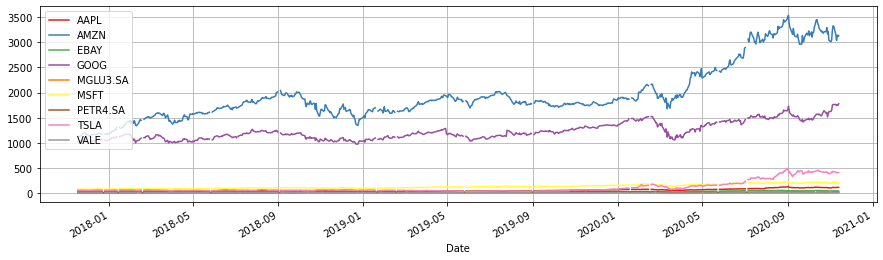

In [3]:
df_companies.Close.plot(figsize=(15, 4), grid=True, colormap='Set1')

### Analyzing the correlation between the data

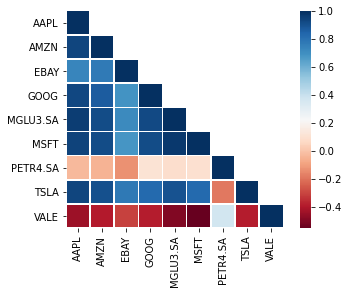

In [4]:
# Calculating the correlation
corr = df_companies.Close.corr()

# Ploting the results
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask, 1)] = True
sns.heatmap(corr, mask=mask, cmap='RdBu', square=True, linewidths=.5)

### Looking better to Tesla dataset 

[*********************100%***********************]  1 of 1 completed


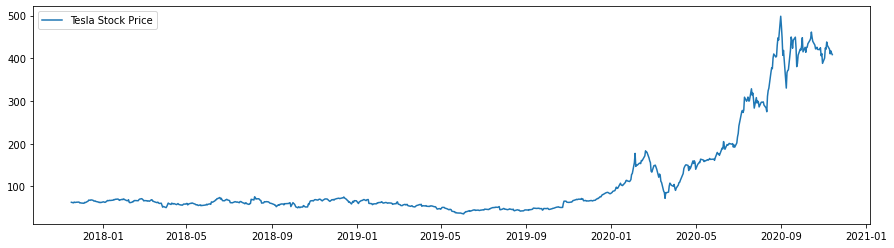

In [5]:
# Parameters
companies = ['TSLA'] 
timerange_years = 3
end_date = datetime.now()

# Dowwnloading Tesla dataset
df_tesla = download_stockdata(companies, timerange_years, end_date)

# Visualizing the data 
plt.figure(figsize=(15,4))
plt.plot(df_tesla['Close'], label = 'Tesla Stock Price')
plt.legend(loc='best')
plt.show()

### Calculating the Relative Strength Index (RSI)

In [6]:
# Parameters
time_window = 14

# Funtion to calculate the Relative Strength Index (RSI) 
def calculateRSI (data, time_window):
    # calculating the difference of between a item and the last one
    diff = data.diff(1).dropna() # exclude the first value (witch is na)

    # Initializing the up_change and down_change variables preserving the sign of diff values
    up_change = 0 * diff
    down_change = 0 * diff
    
    # up change is equal to the positive difference, otherwise it is still equal to zero
    up_change[diff > 0] = diff[ diff>0 ]
    
    # down change is equal to negative difference, otherwise it is still equal to zero
    down_change[diff < 0] = diff[ diff < 0 ]
    
    # Calculating the exponential moving average considering the last "time_window" timesteps
    # 'com'value is related to exponential decay. We set com=time_window-1 to get decay alpha=1/time_window
    up_change_avg = up_change.ewm(com=time_window-1 , min_periods=time_window).mean()
    down_change_avg = down_change.ewm(com=time_window-1 , min_periods=time_window).mean()
    
    # Calculating the Relative Strength Index (RSI) 
    rs = abs(up_change_avg/down_change_avg)
    rsi = 100 - 100/(1+rs)
    return rsi

df_tesla['RSI'] = calculateRSI(df_tesla['Close'], time_window)

df_tesla.tail()

,Open,High,Low,Close,Adj Close,Volume,RSI
Date,,,,,,,
2020-11-09,439.500000,452.500000,421.000000,421.260010,421.260010,34833000,50.197340
2020-11-10,420.089996,420.089996,396.029999,410.359985,410.359985,30284200,46.778286
2020-11-11,416.450012,418.700012,410.579987,417.130005,417.130005,17357700,49.097350
2020-11-12,415.049988,423.000000,409.519989,411.760010,411.760010,19855100,47.335459
2020-11-13,410.850006,412.529999,401.660004,408.500000,408.500000,19771100,46.250368


### Ploting RSI values and significant levels

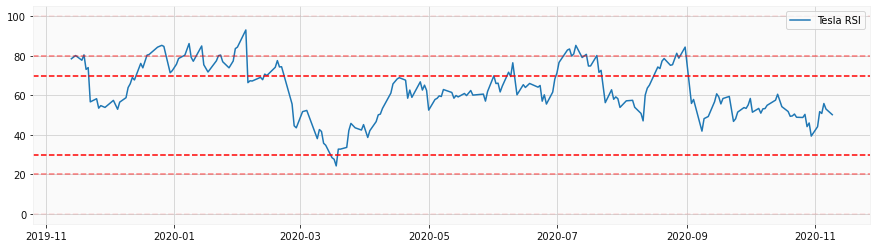

In [166]:
# ploting RSI values
plt.figure(figsize=(15,4))
plt.plot(df_tesla['RSI'].tail(250), label = 'Tesla RSI')
plt.legend(loc='best')

# ploting significant levels
plt.axhline(0, linestyle='--', alpha=0.1, color = 'red')
plt.axhline(20, linestyle='--', alpha=0.5, color = 'red')
plt.axhline(30, linestyle='--', color = 'red')

plt.axhline(70, linestyle='--', color = 'red')
plt.axhline(80, linestyle='--', alpha=0.5, color = 'red')
plt.axhline(100, linestyle='--', alpha=0.1, color = 'red')
plt.show()

### Analyzing candlestick; moving averages behavior considering 5,10, and 20 timestpes; and volume

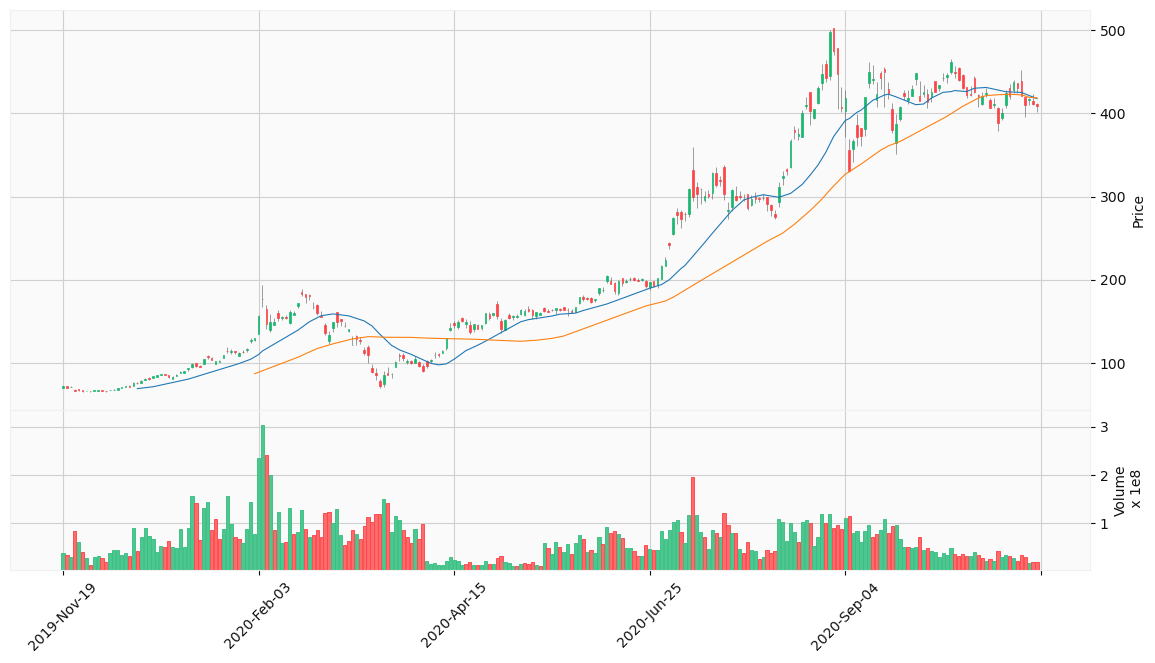

In [7]:
# Importing livrary
import mplfinance as mpf

# Convert the index to datetime
df_tesla.index = pd.to_datetime(df_tesla.index)
    
# Plotting candlestick; moving averages considering 5,10, and 20 timestpes; and volume
mpf.plot(df_tesla.tail(250), type='candle', style='yahoo', ylabel='Price', ylabel_lower='Volume', mav=(20,50), volume = True,
         figsize=(15, 8))

# Part 1 - Data Preprocessing

### Dowwnloading Tesla stock price history of the last 5 years

In [8]:
# Parameters
companies = ['TSLA']
timerange_years = 5 
end_date = datetime.now()

df_tesla = download_stockdata(companies, timerange_years, end_date)
df_tesla.tail()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-11-09,439.500000,452.500000,421.000000,421.260010,421.260010,34833000
2020-11-10,420.089996,420.089996,396.029999,410.359985,410.359985,30284200
2020-11-11,416.450012,418.700012,410.579987,417.130005,417.130005,17357700
2020-11-12,415.049988,423.000000,409.519989,411.760010,411.760010,19855100
2020-11-13,410.850006,412.529999,401.660004,408.500000,408.500000,19771100


### Splitting the dataset into training_set and testing_set

In [9]:
# parameters
timesteps =  60
train_percentage = 0.8

# function to split the dataset into training and testing set
def split_timeserie_train_test(dataset, train_percentage, timesteps):
    
    # Training set with the proportion specified
    training_set = dataset.iloc[:int(dataset.shape[0] * train_percentage)]
    
    # Testing set with the oposit training proportion plus the timesteps needed to the firts prediction
    testing_set_with_timesteps = dataset.iloc[int(dataset.shape[0] * train_percentage)-timesteps:]
    
    return training_set, testing_set_with_timesteps

training_set, testing_set = split_timeserie_train_test(df_tesla[['Close']], train_percentage, timesteps)

print('Total dataset shape: ' + str(df_tesla.shape))
print('Training set shape: ' + str(training_set.shape))
print('Testing set shape: ' + str(testing_set.shape))


Total dataset shape: (1257, 6)
Training set shape: (1005, 1)
Testing set shape: (312, 1)


### Scalling the data

In [10]:
# Feature Scalling 
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0,1))
training_set_scaled = sc.fit_transform(training_set)
testing_set_scaled = sc.fit_transform(testing_set)

print('Trainning set scaled: ')
print(training_set_scaled)

Trainning set scaled: 
[[0.32072269]
 [0.32374759]
 [0.31633032]
 ...
 [0.85468032]
 [0.83885137]
 [0.85227702]]


### Creating X and Y data structure 

In [11]:
# Parameters
days_ahead =  5

# Creating train and test data structure with defined timesteps and outputs 
def split_timeserie_x_y(training_set, testing_set, timesteps, days_ahead):
    
    # Initializing the variables
    x_train, y_train, x_test, y_test = [], [], [], [] 
    
    # Creating a training data structure with defined timesteps
    for i in range(timesteps, training_set.shape[0]-days_ahead):
        x_train.append(training_set[i-timesteps:i,0])
        y_train.append(training_set[i:i+days_ahead,0])
        
    # Creating a testing data structure with defined days_ahead        
    for i in range(timesteps, testing_set.shape[0]-days_ahead):   
        x_test.append(testing_set[i-timesteps:i,0])
        y_test.append(testing_set[i:i+days_ahead,0])

    # Transforming to np.array
    x_train = np.array(x_train) 
    y_train = np.array(y_train)
    x_test = np.array(x_test)
    y_test = np.array(y_test)
    
    return x_train, y_train, x_test, y_test
    
    
x_train, y_train, x_test, y_test = split_timeserie_x_y(training_set_scaled, testing_set_scaled, timesteps, days_ahead)

# printing the shapes
print('x_train shape:' + str(x_train.shape))
print('y_train shape:' + str(y_train.shape))
print('x_test shape:' + str(x_test.shape))
print('y_test shape:' + str(y_test.shape))

x_train shape:(940, 60)
y_train shape:(940, 5)
x_test shape:(247, 60)
y_test shape:(247, 5)


### Reshaping the data to Keras

In [12]:
# Reshaping to Keras
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
y_train = np.reshape(y_train, (y_train.shape[0], y_train.shape[1], 1))
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))
y_test = np.reshape(y_test, (y_test.shape[0], y_test.shape[1], 1))

# Printing the shapes
print('x_train shape:' + str(x_train.shape))
print('y_train shape:' + str(y_train.shape))
print('x_test shape:' + str(x_test.shape))
print('y_test shape:' + str(y_test.shape))

x_train shape:(940, 60, 1)
y_train shape:(940, 5, 1)
x_test shape:(247, 60, 1)
y_test shape:(247, 5, 1)


## Part 2 - Building the LSTM model

### Importing the libraries

In [13]:
import tensorflow as tf
import keras as kr
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

### Building the LSTM architecture

In [14]:
# Parameters
units_firs = 64
units_second = 64
units_third = 64
units_fourth = 64
units_output = days_ahead
dropout_percentage = 0.2

# Building the LSTM architecture with four headen layers
def create_LSTM_architecture(units_firs, units_second, units_third, units_fourth, units_output, dropout_percentage):

    # Initialising the RNN
    regressor = Sequential()

    # Adding the first LSTM layer and some Dropout regularization
    regressor.add(LSTM(units = units_firs, return_sequences = True, input_shape = (x_train.shape[1], 1)))
    regressor.add(Dropout(dropout_percentage))

    # Adding the second LSTM layer and some Dropout regularization
    regressor.add(LSTM(units = units_second, return_sequences = True))
    regressor.add(Dropout(dropout_percentage))

    # Adding the third LSTM layer and some Dropout regularization
    regressor.add(LSTM(units = units_third, return_sequences = True))
    regressor.add(Dropout(dropout_percentage))

    # Adding the fourth LSTM layer and some Dropout regularization
    regressor.add(LSTM(units = units_fourth))
    regressor.add(Dropout(dropout_percentage))

    # Adding  the output layer
    regressor.add(Dense(units = units_output))
    
    return regressor

regressor = create_LSTM_architecture(units_firs, units_second, units_third, units_fourth, units_output, dropout_percentage)

### Compilling the LSTM model

In [15]:
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

### Fitting the LSTM model to the training set

In [16]:
# Parameters
epochs = 100
batch_size = 32

# Fitting the LSTM model to the training set
history = regressor.fit(x_train, y_train, batch_size, epochs, verbose = 2, validation_split=0.20, shuffle=False)

Epoch 1/100
24/24 - 8s - loss: 0.0372 - val_loss: 0.0427
Epoch 2/100
24/24 - 4s - loss: 0.0706 - val_loss: 0.0180
Epoch 3/100
24/24 - 4s - loss: 0.0561 - val_loss: 0.0760
Epoch 4/100
24/24 - 4s - loss: 0.0805 - val_loss: 0.1145
Epoch 5/100
24/24 - 4s - loss: 0.0799 - val_loss: 0.0741
Epoch 6/100
24/24 - 5s - loss: 0.0517 - val_loss: 0.0375
Epoch 7/100
24/24 - 5s - loss: 0.0249 - val_loss: 0.0187
Epoch 8/100
24/24 - 5s - loss: 0.0200 - val_loss: 0.0173
Epoch 9/100
24/24 - 5s - loss: 0.0227 - val_loss: 0.0166
Epoch 10/100
24/24 - 5s - loss: 0.0232 - val_loss: 0.0228
Epoch 11/100
24/24 - 5s - loss: 0.0243 - val_loss: 0.0226
Epoch 12/100
24/24 - 4s - loss: 0.0215 - val_loss: 0.0221
Epoch 13/100
24/24 - 4s - loss: 0.0198 - val_loss: 0.0173
Epoch 14/100
24/24 - 3s - loss: 0.0190 - val_loss: 0.0161
Epoch 15/100
24/24 - 4s - loss: 0.0185 - val_loss: 0.0158
Epoch 16/100
24/24 - 4s - loss: 0.0197 - val_loss: 0.0155
Epoch 17/100
24/24 - 4s - loss: 0.0202 - val_loss: 0.0194
Epoch 18/100
24/24 - 3s

{'loss': [0.0372464619576931,
  0.07064073532819748,
  0.056106530129909515,
  0.08051757514476776,
  0.07992687076330185,
  0.05171133950352669,
  0.02487221173942089,
  0.02001582644879818,
  0.022657101973891258,
  0.023165687918663025,
  0.024284088984131813,
  0.021473996341228485,
  0.019829632714390755,
  0.019043125212192535,
  0.018480801954865456,
  0.019675452262163162,
  0.02023605816066265,
  0.020007720217108727,
  0.01694783754646778,
  0.015753818675875664,
  0.01682826690375805,
  0.017043890431523323,
  0.01808076538145542,
  0.016713811084628105,
  0.015452963300049305,
  0.01641727052628994,
  0.016473961994051933,
  0.015790419653058052,
  0.014655527658760548,
  0.014659563079476357,
  0.013410922139883041,
  0.014729069545865059,
  0.014891455881297588,
  0.01395112182945013,
  0.012869978323578835,
  0.011979671195149422,
  0.012379973195493221,
  0.012383000925183296,
  0.012298304587602615,
  0.011438212357461452,
  0.012139751575887203,
  0.012245862744748592

### Comparing the loss in the training and the validation 

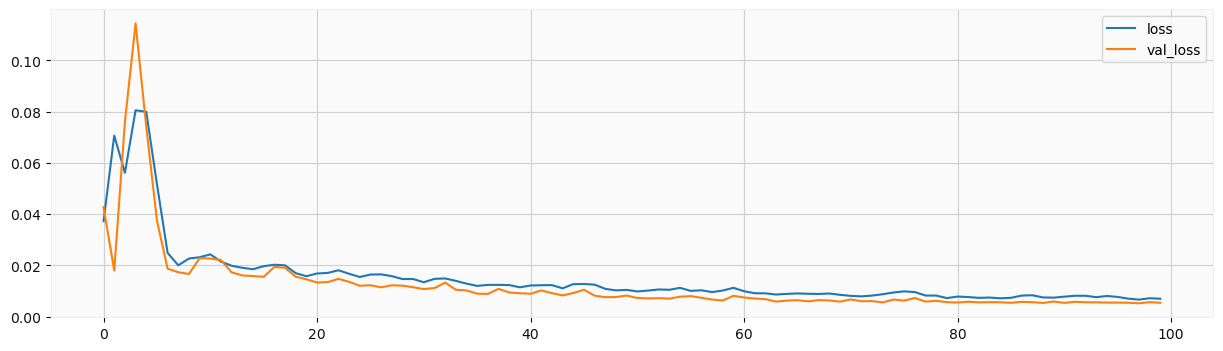

In [17]:
plt.figure(figsize = (15,4))
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.legend(loc='best')
plt.show()

## Part 3 - Making the prediction and visualising the results

### Predicting the stock prices

In [18]:
prediction = regressor.predict(x_test)

### Reversing the scaling

In [19]:
prediction_transformed = sc.inverse_transform(prediction)

### Visualizing the results

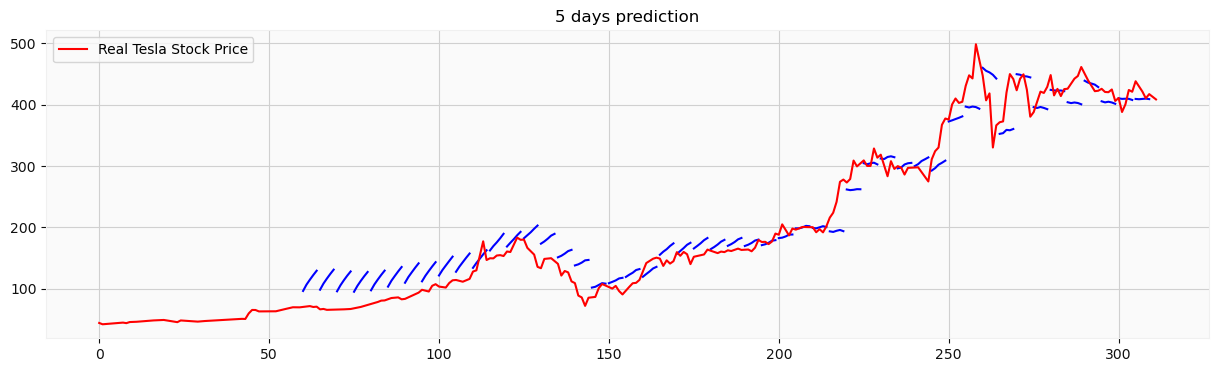

In [20]:
plt.figure(figsize=(15,4))
for i in range(timesteps, prediction_transformed.shape[0]+timesteps, days_ahead):
    x_index_seq = np.array(list(range(i, i+days_ahead))).reshape(-1,1)
    
    # Ploting all the predictions
    plt.plot(x_index_seq, prediction_transformed[i-timesteps], color = 'blue')

# Ploting the real Tesla stock price
plt.plot(list(range(0, testing_set.shape[0])),testing_set, color = 'red', label = 'Real Tesla Stock Price')
plt.title('5 days prediction')
plt.legend(loc=2)
plt.show()

## Part 4 - Measuring the error

Importing the libraries 

In [282]:
#import sklearn as skl
from sklearn.metrics import mean_squared_error
from numpy import sqrt

Inverting the normalization of y_test and reshape it to two dimentions 

In [289]:
y_test_transformed = sc.inverse_transform(y_test[:,:,0])

Function to calculate the RMSE for the forecasts against expected values

In [290]:
def evaluate_rmse(real, predicted):
    rmse_cols, rmse_rows = [], []
    
    # calculate a RMSE score for each day
    for i in range(real.shape[1]):
        # calculate mse
        mse = mean_squared_error(real[:, i], predicted[:, i])
        # calculate rmse
        rmse = np.sqrt(mse)
        # store
        rmse_cols.append(rmse)
	
    # calculate a RMSE score for each prediction
    for i in range(real.shape[0]):
		# calculate mse
        mse = mean_squared_error(real[i,:], predicted[i,:])
        # calculate rmse
        rmse = np.sqrt(mse)
		# store
        rmse_rows.append(rmse)
	
    # calculate overall RMSE
    mse = mean_squared_error(real, predicted)
    rmse_overall = np.sqrt(mse)
    
    return rmse_overall, rmse_cols, rmse_rows


Function to calculate the MAPE for the forecasts against expected values

In [285]:
def evaluate_mape(real, predicted):
    real, predicted = np.array(real), np.array(predicted)
    mape_cols, mape_rows = [], []
    
    # calculate a MAPE score for each day
    for i in range(real.shape[1]):
        # calculate MAPE
        mape = np.mean(np.abs((real[:, i] - predicted[:, i]) / real[:, i])) * 100
        # store
        mape_cols.append(mape)
	# calculate a MAPE score for each prediction
    for i in range(real.shape[0]):
		# calculate mape
        mape = np.mean(np.abs((real[i,:] - predicted[i,:]) / real[i,:])) * 100
		# store
        mape_rows.append(mape)
	
    # calculate overall MAPE
    mape_overall = np.mean(np.abs((real - predicted) / real)) * 100
    
    return mape_overall, mape_cols, mape_rows

Function to calculate the correlation for the forecasts against expected values

In [286]:
def evaluate_corr(real, predict):
    corr_rows = []
    
    # calculate Corr for each prediction
    for i in range(real.shape[0]):
        # calcule Corr
        corr = np.corrcoef(y_test_transformed[i,:],prediction_transformed[i,:])
        corr = corr[0,1]
        # store
        corr_rows.append(corr)
    
    #calculate overall Corr
    corr_overall = np.mean(corr_rows) 
    #calculate the percentage of positive Corr predictions
    positive_corr_percentage = (len([ele for ele in corr_rows if ele > 0]) / len(corr_rows))
    
    return corr_overall, corr_rows, positive_corr_percentage        


Calculating the metrics

In [291]:
rmse_overall, rmse_cols, rmse_rows = evaluate_rmse(y_test_transformed, prediction_transformed)
mape_overall, mape_cols, mape_rows = evaluate_mape(y_test_transformed, prediction_transformed)
corr_overall, corr_rows, positive_corr_percentage = evaluate_corr(y_test_transformed, prediction_transformed)

Printing the Results

In [292]:
print("Overall RMSE: " + str(rmse_overall))
print("Overall MAPE: " + str(mape_overall))
print("Overall CORR: " + str(corr_overall))
print("Positive Corr Percentual: " + str(positive_corr_percentage))
print("Daily RMSE: " + str(rmse_cols))
print("Daily MAPE: " + str(mape_cols))


Overall RMSE: 31.73846012112249
Overall MAPE: 17.790013763761532
Overall CORR: 0.2240108200953712
Positive Corr Percentual: 0.6356275303643725
Daily RMSE: [20.940450210482137, 26.82368962573915, 31.59838744493901, 36.13638086754063, 39.677958148325985]
Daily MAPE: [11.80787546358126, 15.261445313494326, 18.079174704192276, 20.820478013140082, 22.98109532439972]


Ploting the daily RMSE and MAPE

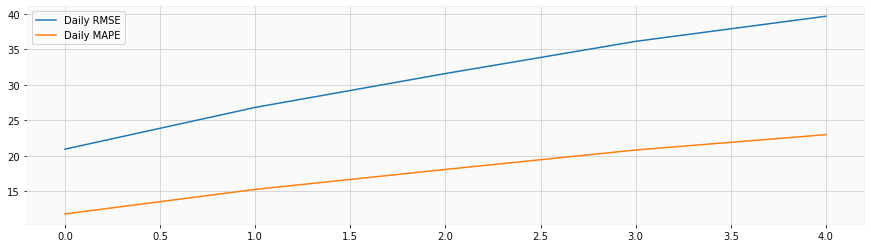

In [293]:
plt.figure(figsize=(15,4))
plt.plot(rmse_cols, label = 'Daily RMSE')
plt.plot(mape_cols, label = 'Daily MAPE')
plt.legend(loc='best')
plt.show()

In [311]:
y_test_transformed[:,1].shape

(247,)

Ploting the RMSE and MAPE history comparing with the real stock prince history

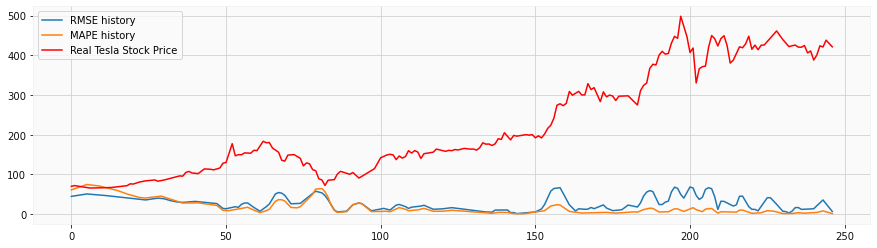

In [312]:
plt.figure(figsize=(15,4))
plt.plot(rmse_rows, label = 'RMSE history')
plt.plot(mape_rows, label = 'MAPE history')
plt.plot(y_test_transformed[:,1], color = 'red', label = 'Real Tesla Stock Price')
plt.legend(loc='best')
plt.show()

Ploting the correlation distribution 

Positive Corr Percentage: 0.6356275303643725
Negative Corr Percentage: 0.3643724696356275


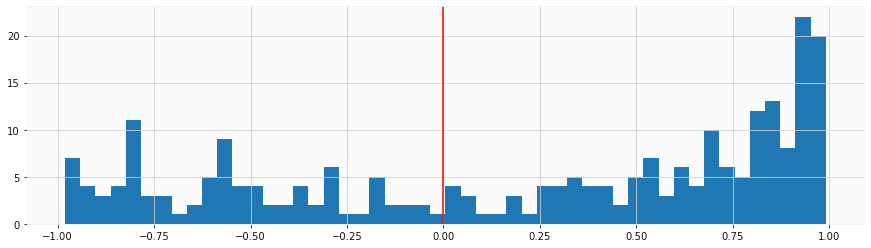

In [314]:
print('Positive Corr Percentage: ' + str(positive_corr_percentage))
print('Negative Corr Percentage: ' + str(1-positive_corr_percentage))
plt.figure(figsize=(15,4))
plt.axvline(0, color = 'red')
plt.hist(corr_rows, bins=50)
plt.show()

# Part 5 - Next steps
1. Optimize LSTM parameters
2. Use the indicators and correlated stock prices to enrich the model
3. Test and compare other RNN algorithms